#### Controle de diretórios

In [3]:
import sys
sys.path.append('../')

import pandas as pd
from utils.plots import plot_curves
from utils.enums import Datas, ModelTypes, Sets
from utils.checkpoints import loadCheckPointData
from metrics_classification import evaluate_classification

#### Variáveis

In [4]:
teste_size = 0
main_data = Datas.MOTION
path_reports = f"../report_results/{Datas.HAR.value}/{main_data.value}_{teste_size}/"

## Análises da tarefa de pretexto

##### Carrega backbone com melhor acurácia (Datas.type)

In [5]:
ck = loadCheckPointData(path="../best_models/", file_name=f"backbone_{main_data.value}_{ModelTypes.PRETEXT.value}", device="cpu")
print("Best Acuracy: ", ck['accuracy'])

Best Acuracy:  53.267744202389316


##### Erro de treinamento x Validação

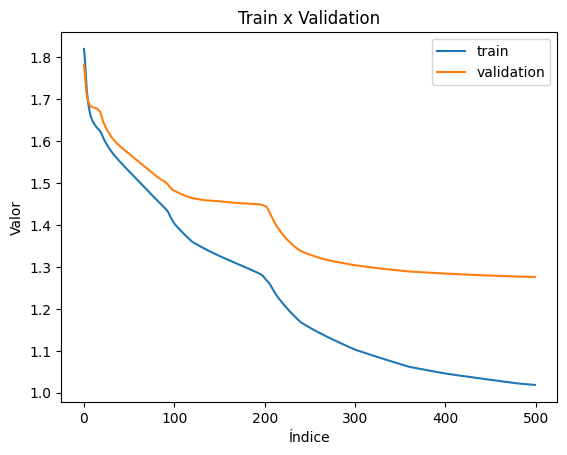

In [6]:
df = pd.read_csv(f"{path_reports}errors_{ModelTypes.PRETEXT.value}.dat", sep=" ")
plot_curves(
    data1=df[Sets.TRAIN.value], 
    data2=df[Sets.VALIDATION.value], 
    data1_legend=Sets.TRAIN.value, 
    data2_legend=Sets.VALIDATION.value, 
    title="Train x Validation"
)

#### Exibe metricas de avaliação

In [7]:
df = pd.read_csv(f"{path_reports}predictions_{ModelTypes.PRETEXT.value}.dat", sep=" ")
metrics = evaluate_classification(
    y_pred= df[Sets.PREDICTION.value],
    y_true= df[Sets.REAL.value]
)

for key, item in metrics.items():
    if not key == "Matriz de Confusão":
        print(f"{key}: {item}")
    else:
        print(f"{key}:\n{item}")

Acurácia: 0.4583333333333333
Precisão: 0.30277777777777776
Revocação: 0.4583333333333333
Pontuação F1: 0.34332358674463936
AUC-ROC: None
Matriz de Confusão:
[[4 0 0 0 0 0]
 [0 0 0 0 0 4]
 [1 0 3 0 0 0]
 [0 0 1 0 0 3]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]]


### Análises da tarefa de downstream

##### Carrega modelo com melhor acurácia

In [8]:
ck = loadCheckPointData(path="../best_models/", file_name=f"model_{main_data.value}_{ModelTypes.DOWNSTREAM.value}", device="cpu")
print("Best Acuracy: ", ck['accuracy'])

Best Acuracy:  66.66666666666667


##### Erro de treinamento x Validação

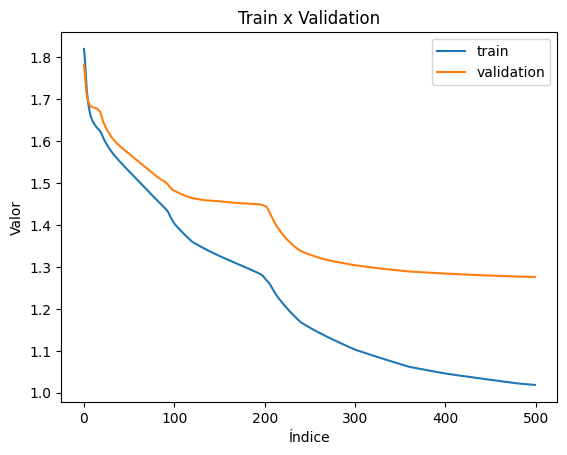

In [9]:
df = pd.read_csv(f"{path_reports}errors_{ModelTypes.DOWNSTREAM.value}.dat", sep=" ")
plot_curves(
    data1=df[Sets.TRAIN.value], 
    data2=df[Sets.VALIDATION.value], 
    data1_legend=Sets.TRAIN.value, 
    data2_legend=Sets.VALIDATION.value, 
    title="Train x Validation"
)

#### Exibe metricas de avaliação

In [10]:
df = pd.read_csv(f"{path_reports}predictions_{ModelTypes.DOWNSTREAM.value}.dat", sep=" ")
metrics = evaluate_classification(
    y_pred= df[Sets.PREDICTION.value],
    y_true= df[Sets.REAL.value]
)

for key, item in metrics.items():
    if not key == "Matriz de Confusão":
        print(f"{key}: {item}")
    else:
        print(f"{key}:\n{item}")

Acurácia: 0.4583333333333333
Precisão: 0.30277777777777776
Revocação: 0.4583333333333333
Pontuação F1: 0.34332358674463936
AUC-ROC: None
Matriz de Confusão:
[[4 0 0 0 0 0]
 [0 0 0 0 0 4]
 [1 0 3 0 0 0]
 [0 0 1 0 0 3]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]]
